In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





In [9]:
files = ["100OHM_22UF_48.78MH_varredura100Hz_3MHz_dados_dados.csv","10OHM_22UF_48.78MH_varredura100Hz_3MHz_dados.csv","1kOHM_22UF_48.78MH_varredura100Hz_3MHz_dados.csv"]
save = True

In [10]:
def print_pair(x,y):
    for i in range(len(x)):
        print("x=", x[i], ", y=", y[i])

arquivo: 100OHM_22UF_48.78MH_varredura100Hz_3MHz_dados_dados.csv


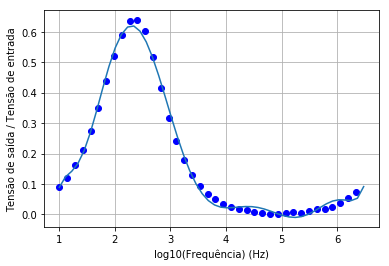

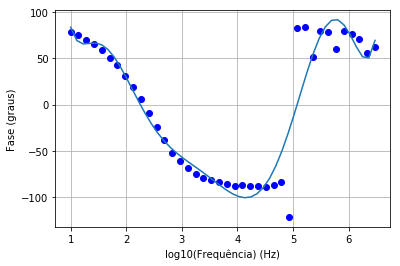

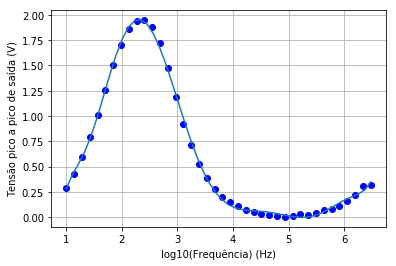

x= 1.0 , y= -21.289736044590654
x= 1.1117779847901972 , y= -18.230065927036435
x= 1.2235559695803944 , y= -16.484835756474922
x= 1.3353339543705915 , y= -15.082328673183724
x= 1.4471119391607887 , y= -13.570708051589463
x= 1.5588899239509861 , y= -11.829136705041265
x= 1.670667908741183 , y= -9.927070628448746
x= 1.7824458935313805 , y= -8.023309640829439
x= 1.8942238783215775 , y= -6.2973033096883455
x= 2.006001863111775 , y= -4.906079267595487
x= 2.1177798479019723 , y= -3.9609824677135066
x= 2.2295578326921692 , y= -3.519188070320297
x= 2.341335817482366 , y= -3.5856775056707875
x= 2.4531138022725636 , y= -4.12204682029062
x= 2.564891787062761 , y= -5.0591486839206254
x= 2.676669771852958 , y= -6.311154413030749
x= 2.788447756643155 , y= -7.7891600535346015
x= 2.9002257414333523 , y= -9.41295096044621
x= 3.0120037262235497 , y= -11.119982416564312
x= 3.1237817110137467 , y= -12.871029643295287
x= 3.235559695803944 , y= -14.652309077659424
x= 3.347337680594141 , y= -16.47417401869927

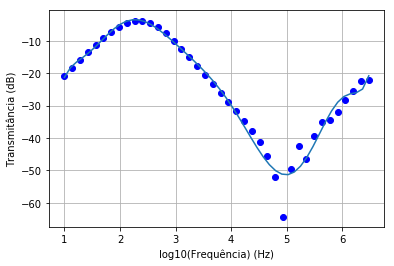

arquivo: 10OHM_22UF_48.78MH_varredura100Hz_3MHz_dados.csv


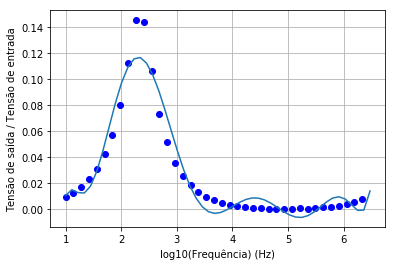

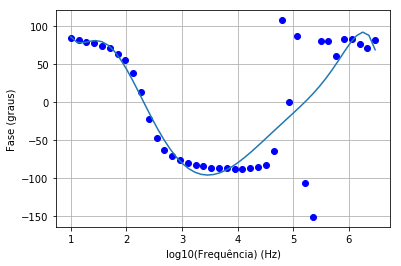

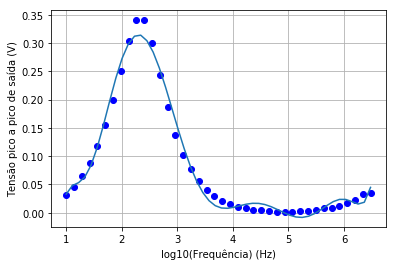

x= 1.0 , y= -40.41769817284728
x= 1.1117779847901972 , y= -37.95188395204241
x= 1.2235559695803944 , y= -36.38825343970575
x= 1.3353339543705915 , y= -34.80686141759304
x= 1.4471119391607887 , y= -32.82838541521505
x= 1.5588899239509861 , y= -30.416202833427178
x= 1.670667908741183 , y= -27.727874259902023
x= 1.7824458935313805 , y= -25.007655982701863
x= 1.8942238783215775 , y= -22.51254916372943
x= 2.006001863111775 , y= -20.46523315461434
x= 2.1177798479019723 , y= -19.028026023860548
x= 2.2295578326921692 , y= -18.29276651575094
x= 2.341335817482366 , y= -18.282218378596895
x= 2.4531138022725636 , y= -18.959260282499713
x= 2.564891787062761 , y= -20.24074239448703
x= 2.676669771852958 , y= -22.013464092494246
x= 2.788447756643155 , y= -24.150256278165216
x= 2.9002257414333523 , y= -26.524636292861942
x= 3.0120037262235497 , y= -29.022943550288915
x= 3.1237817110137467 , y= -31.553259675096115
x= 3.235559695803944 , y= -34.050768176147585
x= 3.347337680594141 , y= -36.47951548946344

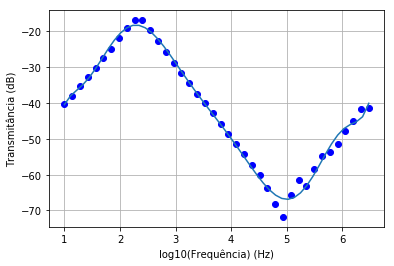

arquivo: 1kOHM_22UF_48.78MH_varredura100Hz_3MHz_dados.csv


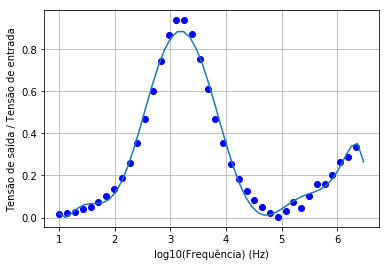

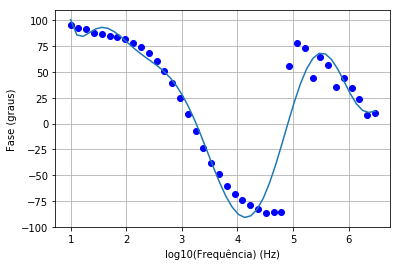

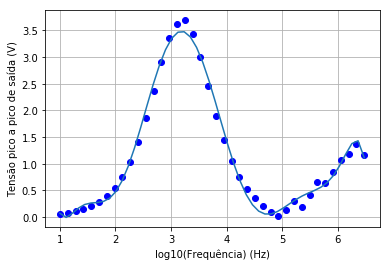

x= 1.0 , y= -36.42442864817258
x= 1.1117779847901972 , y= -33.62339704832027
x= 1.2235559695803944 , y= -31.686149947972694
x= 1.3353339543705915 , y= -29.95909960887934
x= 1.4471119391607887 , y= -28.11911067148867
x= 1.5588899239509861 , y= -26.054018551687705
x= 1.670667908741183 , y= -23.77477929506142
x= 1.7824458935313805 , y= -21.35342790654829
x= 1.8942238783215775 , y= -18.881689165182024
x= 2.006001863111775 , y= -16.445715920493853
x= 2.1177798479019723 , y= -14.11302484918815
x= 2.2295578326921692 , y= -11.928258627827176
x= 2.341335817482366 , y= -9.914926449451514
x= 2.4531138022725636 , y= -8.08076177945702
x= 2.564891787062761 , y= -6.424787208350722
x= 2.676669771852958 , y= -4.9445912167564074
x= 2.788447756643155 , y= -3.6427006204452255
x= 2.9002257414333523 , y= -2.531275411100296
x= 3.0120037262235497 , y= -1.634659651365837
x= 3.1237817110137467 , y= -0.9895930203645094
x= 3.235559695803944 , y= -0.6431225396748914
x= 3.347337680594141 , y= -0.6484529369402026
x=

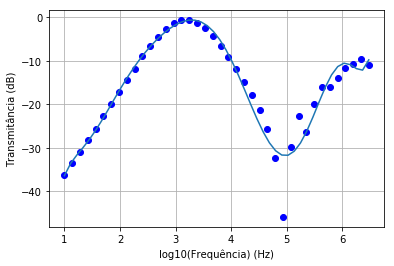

In [11]:
for i in files:
  
  data = pd.read_csv(i)
  freq = np.log10(np.array(data["frequencia (Hz)"]))
  v_out = np.array(data["Vpp2 (V)"])
  v_in = np.array(data["Vpp1 (V)"])
  fase = np.array(data["fase (Ch2-Ch1) (graus)"])
  Tdb = np.array(data["T_dB"])
  
  print("arquivo: " + i)
  
  discard=0
  
  #Vout/Vin
 
  z = np.polyfit(freq, v_out/v_in, 9)
  fa= np.poly1d(z)
  x_new = np.linspace(freq[0], freq[-1], 50)
  y_new = fa(x_new)
  plt.grid(b=True)
  plt.plot(freq[0:-1], v_out[0:-1]/v_in[0:-1], "bo", x_new, y_new)
  plt.xlabel('log10(Frequência) (Hz)')
  plt.ylabel('Tensão de saída / Tensão de entrada')



  
  
  if save:
    plt.savefig( i[0:-4] + " v_out v_in.png", dpi=200)
  
  plt.show()
  
  
  #Fase
  fase[np.isnan(fase)]=0
  z = np.polyfit(freq[:len(freq)-discard], fase[:len(freq)-discard], 9)
  fa= np.poly1d(z)
  x_new = np.linspace(freq[0], freq[-1], 50)
  y_new = fa(x_new)
  plt.grid(b=True)
  plt.plot(freq[:len(freq)-discard], fase[:len(fase)-discard], "bo", x_new, y_new)
  plt.xlabel('log10(Frequência) (Hz)')
  plt.ylabel('Fase (graus)')
  
  if save:
    plt.savefig( i[0:-4] + " Fase.png", dpi=200)  
  
  plt.show()
  
  
  #freq
  z = np.polyfit(freq[:len(freq)-discard], v_out[:len(freq)-discard], 9)
  fa= np.poly1d(z)
  x_new = np.linspace(freq[0], freq[-1], 50)
  y_new = fa(x_new)
  plt.grid(b=True)
  plt.plot(freq[:len(freq)-discard], v_out[:len(v_out)-discard], "bo", x_new, y_new)
  plt.xlabel('log10(Frequência) (Hz)')
  plt.ylabel('Tensão pico a pico de saída (V)')
  
  if save:
    plt.savefig( i[0:-4] + " V pico a pico.png", dpi=200)   
  
  plt.show()

  
  #Transmitancia
  z = np.polyfit(freq, Tdb, 9)
  fa= np.poly1d(z)
  x_new = np.linspace(freq[0], freq[-1], 50)
  y_new = fa(x_new)
  print_pair(x_new,y_new)  
  plt.plot(freq[:len(freq)-discard], Tdb[:len(freq)-discard], "bo", x_new,y_new)
  plt.grid(b=True)
  plt.xlabel('log10(Frequência) (Hz)')
  plt.ylabel('Transmitância (dB)')
  if save:
    plt.savefig( i[0:-4] + " Transmitancia.png", dpi=200)   
  
  plt.show()

In [15]:
def func(w, r, c, l):
    return (1/(w*r*c))-((w*l)/(r))
    
def passa_banda_transmitancia(w,r,c,l):
    return -10*(np.log10(1+(func(w,r,c,l)**2)))

def rejeita_banda_transmitancia(w,r,c,l):
    return 10*(np.log10((func(w,r,c,l)**2)/(1+(func(w,r,c,l)**2))))

def passa_banda_fase(w,r,c,l):
    return np.rad2deg(np.arctan(func(w,r,c,l)))

def rejeita_banda_fase(w,r,c,l):
    return np.rad2deg(np.arctan( (-1)/(func(w,r,c,l))  ))


Plot transmitancia circuito passa-banda

In [13]:
dados=pd.read_csv("des_dados.csv")
freq = (dados["frequencia (Hz)"].to_numpy(dtype="float64"))
Tdb = dados["T_dB"].to_numpy(dtype="float64")
w=freq*2*np.pi
teo_y=passa_banda_transmitancia(w,1000,0.00000022,0.050)
freq=np.log10(freq)
discard=1

FileNotFoundError: File b'des_dados.csv' does not exist

NameError: name 'teo_y' is not defined

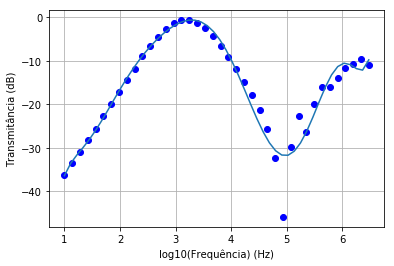

In [14]:
z = np.polyfit(freq, Tdb, 9)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1-discard], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], Tdb[:len(freq)-discard], "bo", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Transmitância (dB)')

z = np.polyfit(freq, teo_y, 9)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1-discard], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], teo_y[:len(freq)-discard], "go", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Transmitância (dB)')

plt.legend(["ponto experimental", "ajuste experimental", "ponto modelo 1", "ajuste modelo 1"], loc="best")
plt.savefig("comparacao_passa_transmitancia.png", dpi=600)

Plot Fase circuito passa-banda

In [ ]:
dados=pd.read_csv("circuito_passa.csv")
freq = (dados["frequencia (Hz)"].to_numpy(dtype="float64"))
Tdb = dados["fase (Ch2-Ch1) (graus)"].to_numpy(dtype="float64")
w=freq*2*np.pi
teo_y=passa_banda_fase(w,1000,0.00000022,0.050)
freq=np.log10(freq)
discard=1

In [ ]:
z = np.polyfit(freq, Tdb, 9)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1-discard], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], Tdb[:len(freq)-discard], "bo", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Fase (graus)')

z = np.polyfit(freq, teo_y, 9)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1-discard], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], teo_y[:len(freq)-discard], "go", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Fase (graus)')

plt.legend(["ponto experimental", "ajuste experimental", "ponto teorico", "ajuste teorico"], loc="best")
plt.savefig("comparacao_passa_fase.png", dpi=600)

Plot transmitancia circuito rejeita-banda

In [ ]:
dados=pd.read_csv("circuito_rejeita.csv")
freq = (dados["frequencia (Hz)"].to_numpy(dtype="float64"))
Tdb = dados["T_dB"].to_numpy(dtype="float64")
w=freq*2*np.pi
teo_y=rejeita_banda_transmitancia(w,1000,0.00000022,0.050 )

freq=np.log10(freq)
discard=0

In [ ]:
z = np.polyfit(freq, Tdb, 10)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], Tdb[:len(freq)-discard], "bo", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Transmitância (dB)')

z = np.polyfit(freq, teo_y, 10)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], teo_y[:len(freq)-discard], "go", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Transmitância (dB)')

plt.legend(["ponto experimental", "ajuste experimental", "ponto teorico", "ajuste teorico"], loc="best")
plt.savefig("comparacao_rejeita_transmitancia.png", dpi=600)

Plot Fase circuito Rejeita-banda

In [ ]:
dados=pd.read_csv("circuito_rejeita.csv")
freq = (dados["frequencia (Hz)"].to_numpy(dtype="float64"))
Tdb = dados["fase (Ch2-Ch1) (graus)"].to_numpy(dtype="float64")
w=freq*2*np.pi
teo_y=rejeita_banda_fase(w,1000,0.00000022,0.050)
freq=np.log10(freq)
discard=1

In [ ]:
z = np.polyfit(freq, Tdb, 9)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1-discard], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], Tdb[:len(freq)-discard], "bo", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Fase (graus)')

z = np.polyfit(freq, teo_y, 9)
fa= np.poly1d(z)
x_new = np.linspace(freq[0], freq[-1-discard], 50)
y_new = fa(x_new)
plt.plot(freq[:len(freq)-discard], teo_y[:len(freq)-discard], "go", x_new,y_new)
plt.grid(b=True)
plt.xlabel('log10(Frequência) (Hz)')
plt.ylabel('Fase (graus)')

plt.legend(["ponto experimental", "ajuste experimental", "ponto teorico", "ajuste teorico"], loc="best")
plt.savefig("comparacao_rejeita_fase.png", dpi=600)